In [1]:
# loading all the packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading an excel file and storing it in a dataframe(df)
train = pd.read_excel(r"C:\Users\saik0\Downloads\AI-Machine Learning Exam\Training Set.xlsx", sheet_name = 'Sheet 1' )
test = pd.read_excel(r"C:\Users\saik0\Downloads\AI-Machine Learning Exam\Test Set.xlsx", sheet_name = 'Sheet 1')

In [3]:
# checking first few rows of 
train.head()

,Date,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,target
0,2020-01-08 00:00:00,1,4,7,2400.41,2479.45,1383.7,-100.7,3654.911667,2473.00,1837.47,2296.059524,2475.68
1,2020-01-08 01:00:00,2,4,7,2475.68,2494.00,1339.3,-44.4,3655.023333,2459.38,1434.83,2299.858393,2484.40
2,2020-01-08 02:00:00,3,4,7,2484.40,2474.85,1309.4,-29.9,3656.065833,2370.61,1498.33,2306.105833,2486.89
3,2020-01-08 03:00:00,4,4,7,2486.89,2478.66,1294.7,-14.7,3660.910833,2021.43,1462.42,2311.990119,2533.42
4,2020-01-08 04:00:00,5,4,7,2533.42,2809.63,1361.4,66.7,3682.243750,2176.48,1455.85,2318.365119,2850.75


## 1. EDA

Exploring the data set to understand about the data

In [4]:
# looking at statistical values
train.describe()

,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,target
count,7584.000000,7584.000000,7584.000000,7584.000000,7584.000000,7584.000000,7584.000000,7584.000000,7584.000000,7584.000000,7584.000000,7584.000000
mean,12.500000,4.000000,4.572785,2429.484570,2327.516847,1587.817563,0.017128,2433.184528,2426.827399,2464.853534,2442.328138,2429.366103
std,6.922643,1.996965,1.390982,1590.715120,1419.109180,213.112880,73.092988,1125.325853,1564.734896,1605.184755,870.873043,1590.750740
min,1.000000,1.000000,1.000000,124.160000,87.380000,1079.800000,-465.200000,1145.512917,124.160000,124.160000,1409.440833,124.160000
25%,6.750000,2.000000,4.000000,1664.395000,1651.850000,1400.975000,-50.425000,1722.828854,1666.838500,1676.697500,1813.919442,1664.347500
50%,12.500000,4.000000,5.000000,1945.810000,1922.320000,1583.300000,-16.200000,2029.105417,1951.465000,1967.165000,2060.332396,1945.700000
75%,18.250000,6.000000,5.000000,2568.547500,2507.287500,1757.625000,43.300000,2725.680729,2595.940000,2603.567500,2823.226385,2568.547500
max,24.000000,7.000000,8.000000,10117.855409,9548.439791,2192.300000,661.200000,7691.478347,10117.855409,10117.855409,5520.089733,10117.855409


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7584 entries, 0 to 7583
Data columns (total 13 columns):
Date                   7584 non-null datetime64[ns]
Hour                   7584 non-null int64
Weekday                7584 non-null int64
Is Working Day         7584 non-null int64
Previous Hour Price    7584 non-null float64
SDSH DAP               7584 non-null float64
SDSH Volume            7584 non-null float64
Sgn0 VolumeDir         7584 non-null float64
P24HA Price            7584 non-null float64
PDSH Price             7584 non-null float64
PWSH Price             7584 non-null float64
PWA Price              7584 non-null float64
target                 7584 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(3)
memory usage: 770.4 KB


In [6]:
# checking for null values 
train.isnull().sum()

Date                   0
Hour                   0
Weekday                0
Is Working Day         0
Previous Hour Price    0
SDSH DAP               0
SDSH Volume            0
Sgn0 VolumeDir         0
P24HA Price            0
PDSH Price             0
PWSH Price             0
PWA Price              0
target                 0
dtype: int64

# Training and validating 

In [7]:
# Diving into feature (X) and target (y) matrices
X = train.drop(['Date','target'], axis = 1) # feature_matrix
y = train['target']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CC29107CA0>,
      dtype=object)

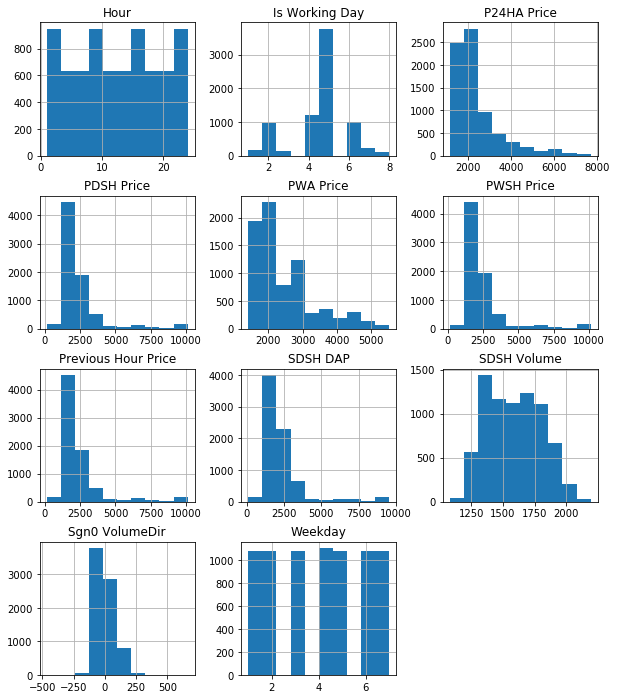

In [8]:
X.hist(figsize = (10,12))

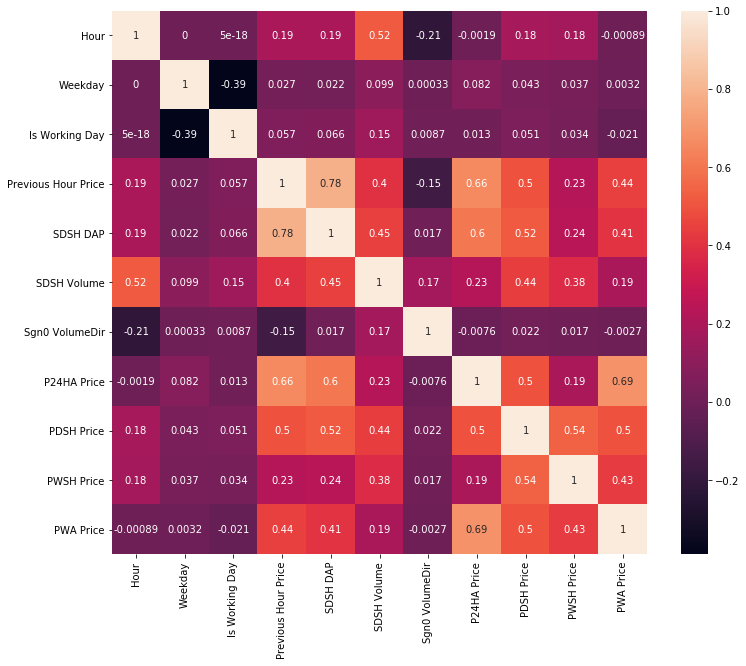

In [9]:
# Using Pearson Correlationcorrelation 
plt.figure(figsize=(12,10))
features_correlation = X.corr()
sns.heatmap(features_correlation, annot=True)
plt.show()

In [10]:
# separate dataset into train and validation set
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val  = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, X_val.shape

((6067, 11), (1517, 11))

In [11]:
from xgboost import XGBRegressor, plot_importance 
xgb_model1 = XGBRegressor()
xgb_model1.fit(X_train, y_train, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

# XGBoost Model 1

In [12]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


y_train_pred1 = xgb_model1.predict(X_train)
y_pred1 = xgb_model1.predict(X_val)

print('Train r2 score: ', r2_score(y_train_pred1, y_train))
print('Val r2 score: ', r2_score(y_val, y_pred1))
train_mse1 = mean_squared_error(y_train_pred1, y_train)
val_mse1 = mean_squared_error(y_pred1, y_val)
train_rmse1 = train_mse1**(1/2)
val_rmse1 = val_mse1**(1/2)
print('Train RMSE: %.4f' % train_rmse1)
print('Val RMSE: %.4f' % val_rmse1)

Train r2 score:  0.9937730878218226
Val r2 score:  0.8179066555591556
Train RMSE: 125.2321
Val RMSE: 652.8375


C:\Users\saik0\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


# XG Boost Model 2

In [13]:
xgb_model2 = XGBRegressor(n_estimators=1000)
xgb_model2.fit(X_train, y_train, early_stopping_rounds=5, 
             eval_set=[(X_val, y_val)], verbose=False)
y_train_pred2 = xgb_model2.predict(X_train)
y_pred2 = xgb_model2.predict(X_val)

print('Train r2 score: ', r2_score(y_train_pred2, y_train))
print('Val r2 score: ', r2_score(y_val, y_pred2))
train_mse2 = mean_squared_error(y_train_pred2, y_train)
val_mse2 = mean_squared_error(y_pred2, y_val)
train_rmse2 = train_mse2 ** (1/2)
val_rmse2 = val_mse2 ** (1/2)
print('Train RMSE: %.4f' % train_rmse2)
print('Val RMSE: %.4f' % val_rmse2)

Train r2 score:  0.9543103423138108
Val r2 score:  0.8272035941352078
Train RMSE: 324.9059
Val RMSE: 635.9536


C:\Users\saik0\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


 >Slight Improvement

# XGBoost Model 3

- Tuning Hyperparameters

In [14]:
xgb_model4 = XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                         colsample_bytree=1, max_depth=7, n_jobs=-1)
xgb_model4.fit(X_train,y_train)
y_train_pred4 = xgb_model4.predict(X_train)
y_pred4 = xgb_model4.predict(X_val)

print('Train r2 score: ', r2_score(y_train_pred4, y_train))
print('Val r2 score: ', r2_score(y_val, y_pred4))
train_mse4 = mean_squared_error(y_train_pred4, y_train)
val_mse4 = mean_squared_error(y_pred4, y_val)
train_rmse4 = (train_mse4) ** (1/2)
val_rmse4 = (val_mse4)**(1/2)
print('Train RMSE: %.4f' % train_rmse4)
print('Val RMSE: %.4f' % val_rmse4)

Train r2 score:  0.9816751525112224
Val r2 score:  0.8329787455410504
Train RMSE: 211.4323
Val RMSE: 625.2359


C:\Users\saik0\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


> Slight improvement

# Test dataset

In [15]:
test_set = test.drop('Date', axis = 1)
test_set.head()

,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,target
0,1,5,5,1501.96,1501.70,1563.7,-50.6,1622.125000,1513.71,593.880,1458.818810,NaN
1,2,5,5,1475.95,1508.89,1522.3,-41.4,1620.551667,1487.63,1004.500,1464.069226,NaN
2,3,5,5,1479.86,1379.23,1468.5,-53.8,1620.227917,1368.59,1025.598,1466.898750,NaN
3,4,5,5,1484.50,1335.80,1443.3,-25.2,1625.057500,1321.87,1046.696,1469.630310,NaN
4,5,5,5,1318.03,1329.68,1445.1,1.8,1624.897500,1317.43,1067.794,1471.245393,NaN


In [16]:
test_set.shape

(96, 12)

In [17]:
# Test data for prediction
X_test_set = test_set.iloc[:, :-1]
X_test_set

,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price
0,1,5,5,1501.96,1501.70,1563.7,-50.6,1622.125000,1513.71,593.880,1458.818810
1,2,5,5,1475.95,1508.89,1522.3,-41.4,1620.551667,1487.63,1004.500,1464.069226
2,3,5,5,1479.86,1379.23,1468.5,-53.8,1620.227917,1368.59,1025.598,1466.898750
3,4,5,5,1484.50,1335.80,1443.3,-25.2,1625.057500,1321.87,1046.696,1469.630310
4,5,5,5,1318.03,1329.68,1445.1,1.8,1624.897500,1317.43,1067.794,1471.245393
...,...,...,...,...,...,...,...,...,...,...,...
91,20,1,4,1526.21,1453.48,1699.2,-29.8,1404.308333,1478.62,1478.620,1572.208988
92,21,1,4,1508.22,1429.08,1658.6,-40.6,1413.315000,2003.47,2003.470,1572.385179
93,22,1,4,1522.36,1436.56,1584.6,-74.0,1420.927500,1495.85,1495.850,1569.521429
94,23,1,4,1498.13,1330.44,1529.7,-54.9,1419.888750,1511.13,1511.130,1569.535000


# Predictions on Test Dataset

- Now we use these models to predict on the test dataset 

### XGboost-Model 1 Predictions

In [18]:
y_pred_1 = xgb_model1.predict(X_test_set)
print(y_pred_1)

[1454.2109 1459.3186 1481.8602 1412.9075 1359.8274 1317.1774 1318.6378
 1526.1973 1695.6791 1653.8763 2007.2028 1674.6388 1757.0233 2413.3103
 2090.4512 1936.8289 1634.6327 2124.9785 1695.0281 1552.2919 1571.1158
 1743.7509 1821.1659 1557.8004 1521.3011 1421.6147 1464.5863 1511.9818
 1371.4534 1376.6349 1372.586  1513.9032 1589.0073 1518.0289 1644.8541
 1668.2446 2000.0834 2051.882  1986.3956 1802.5901 1517.7933 2102.2625
 1554.7135 1604.1969 1950.1279 1874.0287 2094.6118 1657.6716 1522.318
 1461.1532 1467.3843 1424.0896 1329.8469 1355.3998 1305.6453 1299.7601
 1588.3309 1677.7516 1719.0659 1585.8756 1617.1608 1602.7852 1537.7125
 1508.4907 1637.8289 1867.6414 1659.6108 1369.4442 1454.0223 1523.3309
 1452.1748 1500.6213 1404.5454 1526.2579 1488.0989 1469.949  1431.2449
 1275.9335 1278.8961 1310.2875 1393.8396 1404.8353 1486.9064 1403.6124
 1317.5433 1290.5525 1317.8154 1320.1465 1352.1168 1703.2692 1697.6478
 1492.9598 1465.206  1454.8214 1435.622  1332.5728]


C:\Users\saik0\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


## XGboost-Model 2 Predictions

In [19]:
y_pred_2 = xgb_model2.predict(X_test_set)
print(y_pred_2)

[1508.4667 1508.4667 1456.4921 1456.4921 1323.5455 1335.0503 1347.9534
 1524.884  1659.2732 1821.8197 2257.8528 1541.1328 1668.7375 2187.2866
 1950.4993 1822.3746 1622.6072 2187.2866 1698.9716 1508.4667 1469.8575
 1899.6267 1821.4833 1513.7378 1513.8613 1400.9602 1521.0653 1480.8999
 1347.9534 1338.6321 1327.1866 1492.6125 1532.4623 1563.1982 1601.0924
 1628.2107 1545.8844 1697.9254 1739.1372 1698.9716 1671.8866 2053.393
 1739.1372 1711.0051 1889.3081 1990.2224 2119.2861 1622.1372 1473.0525
 1480.8999 1480.8999 1388.1188 1347.9534 1370.9036 1388.1188 1301.5758
 1595.0864 1682.1826 1737.9552 1542.9268 1590.7927 1571.5823 1519.9714
 1508.4667 1641.8301 1830.9431 1657.2181 1414.9775 1420.2487 1380.7911
 1495.5879 1461.7632 1412.6118 1521.0653 1480.8999 1462.75   1404.7482
 1297.235  1297.235  1320.1852 1423.0947 1449.4053 1501.3799 1432.315
 1354.7534 1343.2487 1343.2487 1343.2487 1366.1989 1590.1368 1603.3347
 1508.4667 1505.8394 1513.7378 1481.4663 1328.8167]


## XGboost-Model 3 Predictions

In [20]:
y_pred_4 = xgb_model4.predict(X_test_set)
print(y_pred_4)

[1504.4911 1481.6327 1432.0059 1435.377  1333.4333 1341.4808 1385.5045
 1556.8474 1763.9463 1902.4398 2822.0002 1642.6317 1656.3907 2446.3826
 2001.7637 1790.4882 1626.7555 2411.5315 1678.5714 1484.0653 1541.5999
 1844.9365 1853.5607 1530.0842 1631.1321 1537.6729 1519.755  1514.6057
 1420.034  1362.7273 1368.8473 1511.0441 1558.948  1551.3224 1657.5374
 1629.6539 1550.0938 1741.8706 1850.5361 1678.2867 1614.0317 1992.401
 1621.9077 1628.2496 1908.5784 2075.5325 2236.3994 1597.7854 1484.6718
 1419.1165 1484.4811 1299.3153 1382.8525 1330.9319 1322.5216 1319.5085
 1595.8516 1686.5292 1775.1063 1525.7356 1559.044  1604.6982 1530.2972
 1485.8405 1637.147  1907.7239 1687.864  1356.5382 1344.8793 1386.9707
 1456.6041 1434.0454 1390.2628 1531.6847 1481.4261 1441.4891 1396.385
 1283.9873 1287.8615 1296.5869 1376.3804 1421.087  1474.7517 1408.965
 1398.9808 1307.3813 1315.441  1300.9192 1350.329  1687.8209 1619.403
 1487.071  1537.9089 1472.6963 1444.1172 1291.178 ]


## Feature importance

In [21]:
from collections import OrderedDict
OrderedDict(sorted(xgb_model1.get_booster().get_fscore().items(), key=lambda t: t[1], reverse=True))

OrderedDict([('Previous Hour Price', 658),
             ('SDSH DAP', 561),
             ('Hour', 465),
             ('Sgn0 VolumeDir', 428),
             ('P24HA Price', 394),
             ('SDSH Volume', 386),
             ('PWA Price', 344),
             ('PDSH Price', 328),
             ('PWSH Price', 315),
             ('Weekday', 210),
             ('Is Working Day', 74)])

In [22]:
most_relevant_features= list( dict((k, v) for k, v in xgb_model1.get_booster().get_fscore().items() if v >= 4).keys())
print(most_relevant_features)

['SDSH DAP', 'Previous Hour Price', 'Sgn0 VolumeDir', 'PWSH Price', 'PDSH Price', 'P24HA Price', 'Weekday', 'Hour', 'SDSH Volume', 'Is Working Day', 'PWA Price']


# ElasticNet Model

In [23]:
from sklearn.linear_model import ElasticNetCV, ElasticNet

- Tuning Hyperparmeters using crossvalidation 

In [24]:
cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], eps=1e-3, n_alphas=100, fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=2000, tol=0.0001, cv=6, 
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=0)

In [25]:
cv_model.fit(X_train, y_train)

ElasticNetCV(cv=6, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=2000,
             n_jobs=-1, normalize=True, random_state=0)

In [26]:
print('Optimal alpha: %.8f'%cv_model.alpha_)
print('Optimal l1_ratio: %.3f'%cv_model.l1_ratio_)
print('Number of iterations %d'%cv_model.n_iter_)

Optimal alpha: 0.06854984
Optimal l1_ratio: 1.000
Number of iterations 18


In [27]:
y_train_pred = cv_model.predict(X_train)
y_pred = cv_model.predict(X_val)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Val r2 score: ', r2_score(y_val, y_pred))
train_mse = mean_squared_error(y_train_pred, y_train)
val_mse = mean_squared_error(y_pred, y_val)
train_rmse = np.sqrt(train_mse)
val_rmse = np.sqrt(val_mse)
print('Train RMSE: %.4f' % train_rmse)
print('Test RMSE: %.4f' % val_rmse)

Train r2 score:  0.8229755245355375
Val r2 score:  0.8077685162526922
Train RMSE: 620.3207
Test RMSE: 670.7649


# ElasticNet Model Predictions on TEST SET

In [28]:
y_pred_ElasticNet = cv_model.predict(X_test_set)
print(y_pred_ElasticNet)

[1419.13327073 1419.21440795 1312.89323904 1328.29258324 1300.55295114
 1341.63390474 1385.84259824 1698.90599732 1951.67623918 2129.68418637
 2439.05993461 1747.75205154 1718.1491773  2157.48285112 2074.53801328
 1808.13784214 1570.98210583 2171.49790504 1636.71183688 1471.39273034
 1465.35708163 1662.7920259  1708.66668254 1407.29093419 1520.59675182
 1433.37109814 1419.78579528 1437.59016115 1422.19871906 1345.78530777
 1367.51201081 1621.20847046 1811.66377679 1642.1009283  1758.84912299
 1617.658303   1596.31509992 1882.56122004 1936.13050427 1775.07886676
 1555.59708029 2059.51043777 1708.56641083 1650.9151581  1780.4851188
 1790.27825345 1972.80390322 1561.17274109 1337.54292169 1356.86648005
 1420.66670609 1327.00835436 1379.56532854 1365.20723352 1317.08902309
 1298.08055393 1762.67473608 1813.31570093 1872.18817085 1446.14013316
 1562.19540405 1643.29043371 1579.21630415 1456.38318371 1651.3541523
 2074.46378447 1670.99302769 1548.71993855 1515.34565951 1234.3412331
 1358.389

## Best Model - XGBoost model 3

- from the above models the XGBoost model 3 is Performing better because
    >  it has better Training and Validation Accuracy
    
- Storing the results to excel file

In [29]:
predicted_set4 = pd.DataFrame(y_pred_4)

In [30]:
predicted_set4.rename(columns = {0:'Target_Price_Prediction'}, inplace = True)
predicted_set4

,Target_Price_Prediction
0,1504.491089
1,1481.632690
2,1432.005859
3,1435.376953
4,1333.433350
...,...
91,1487.071045
92,1537.908936
93,1472.696289
94,1444.117188


In [31]:
result4 = pd.concat([X_test_set, predicted_set4], axis = 1)
result4.head()

,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,Target_Price_Prediction
0,1,5,5,1501.96,1501.70,1563.7,-50.6,1622.125000,1513.71,593.880,1458.818810,1504.491089
1,2,5,5,1475.95,1508.89,1522.3,-41.4,1620.551667,1487.63,1004.500,1464.069226,1481.632690
2,3,5,5,1479.86,1379.23,1468.5,-53.8,1620.227917,1368.59,1025.598,1466.898750,1432.005859
3,4,5,5,1484.50,1335.80,1443.3,-25.2,1625.057500,1321.87,1046.696,1469.630310,1435.376953
4,5,5,5,1318.03,1329.68,1445.1,1.8,1624.897500,1317.43,1067.794,1471.245393,1333.433350


In [32]:
result4.tail()

,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,Target_Price_Prediction
91,20,1,4,1526.21,1453.48,1699.2,-29.8,1404.308333,1478.62,1478.62,1572.208988,1487.071045
92,21,1,4,1508.22,1429.08,1658.6,-40.6,1413.315000,2003.47,2003.47,1572.385179,1537.908936
93,22,1,4,1522.36,1436.56,1584.6,-74.0,1420.927500,1495.85,1495.85,1569.521429,1472.696289
94,23,1,4,1498.13,1330.44,1529.7,-54.9,1419.888750,1511.13,1511.13,1569.535000,1444.117188
95,24,1,4,1334.21,1297.81,1445.3,-84.4,1411.941250,1496.18,1496.18,1568.481905,1291.177979


In [33]:
result4.shape

(96, 12)

- Saving the results to excel file

In [34]:
result4.to_excel('electricity_price_XGBoost4_predictions1.xlsx')

                                            # Thank you